## Decision Tree on  imbalanced dataset

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import matthews_corrcoef, accuracy_score, precision_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

In [2]:
# Load the imbalanced data
imbalanced_data = pd.read_csv("Unbalanced_hotel_data.csv")
X = imbalanced_data.drop(columns=['is_canceled'])
y = imbalanced_data['is_canceled']

# Handle class imbalance
n_samples = len(y)
n_classes = len(np.unique(y))
class_weights = {cls: n_samples/(n_classes * sum(y == cls)) for cls in np.unique(y)}

# Split the data into training and testing sets 70:30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



In [3]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

base_dt = DecisionTreeClassifier(random_state=42, class_weight=class_weights)

print("Starting Grid Search...")
grid_search = GridSearchCV(
    estimator=base_dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("\nBest Parameters:")
print(grid_search.best_params_)
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

Starting Grid Search...

Best Parameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Best Cross-Validation Score: 0.7600


In [4]:

best_dt = grid_search.best_estimator_

y_pred = best_dt.predict(X_test)
y_prob = best_dt.predict_proba(X_test)[:, 1]

In [5]:

# Calculated Gini impurity
n_nodes = best_dt.tree_.node_count
gini_scores = best_dt.tree_.impurity
weighted_gini = np.average(gini_scores, weights=best_dt.tree_.weighted_n_node_samples[:n_nodes])

fpr, tpr, _ = roc_curve(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
roc_auc = auc(fpr, tpr)

print("\nBest Model Performance on Test Set:")
print("-" * 50)
print(f"Accuracy: {accuracy:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"AUC: {roc_auc:.4f}")


Best Model Performance on Test Set:
--------------------------------------------------
Accuracy: 0.7671
MCC: 0.4379
Precision: 0.7752
AUC: 0.8160



Classification Report:
              precision    recall  f1-score   support

           0     0.8529    0.8191    0.8357     18650
           1     0.5724    0.6317    0.6006      7151

    accuracy                         0.7671     25801
   macro avg     0.7127    0.7254    0.7181     25801
weighted avg     0.7752    0.7671    0.7705     25801



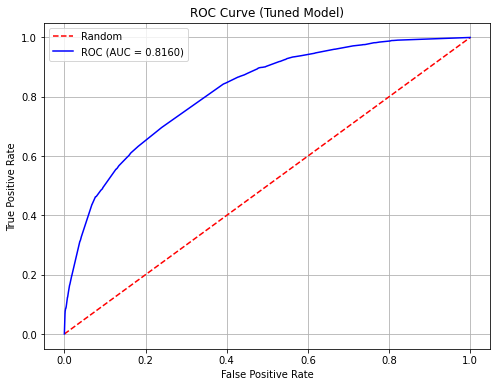

In [6]:

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.plot(fpr, tpr, 'b-', label=f'ROC (AUC = {roc_auc:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Model)')
plt.legend()
plt.grid(True)
plt.show()


#### With Imbalanced dataset even after applying class_weights this is the best precision possible for is_canceled target variable. 

## Decision Tree on Balanced Dataset

In [7]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
balanced_data = pd.read_csv("Balanced_hotel_data.csv")  
X = balanced_data.drop(columns=['is_canceled'])
y = balanced_data['is_canceled']

# Split the data into training and testing sets 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [9]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

base_dt = DecisionTreeClassifier(random_state=42) 
print("Starting Grid Search...")
grid_search = GridSearchCV(
    estimator=base_dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("\nBest Parameters:")
print(grid_search.best_params_)
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")



Starting Grid Search...

Best Parameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
Best Cross-Validation Score: 0.7259


In [10]:

best_dt = grid_search.best_estimator_

y_pred = best_dt.predict(X_test)
y_prob = best_dt.predict_proba(X_test)[:, 1]

# Calculate Gini impurity
n_nodes = best_dt.tree_.node_count
gini_scores = best_dt.tree_.impurity
weighted_gini = np.average(gini_scores, weights=best_dt.tree_.weighted_n_node_samples[:n_nodes])


In [11]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
roc_auc = auc(fpr, tpr)

cm = confusion_matrix(y_test, y_pred)

print("\nBest Model Performance on Test Set:")
print("-" * 50)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Best Model Performance on Test Set:
--------------------------------------------------
Accuracy: 0.7290
Precision: 0.7308
AUC: 0.8123

Classification Report:
              precision    recall  f1-score   support

           0     0.7108    0.7723    0.7403      7151
           1     0.7507    0.6857    0.7168      7150

    accuracy                         0.7290     14301
   macro avg     0.7308    0.7290    0.7285     14301
weighted avg     0.7308    0.7290    0.7285     14301



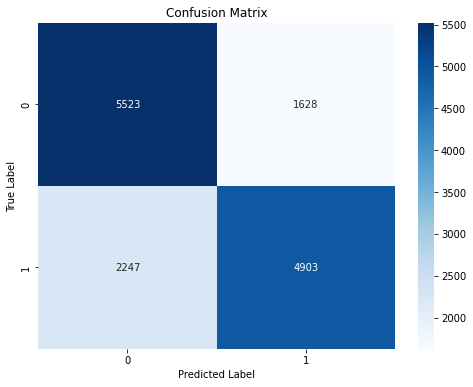

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


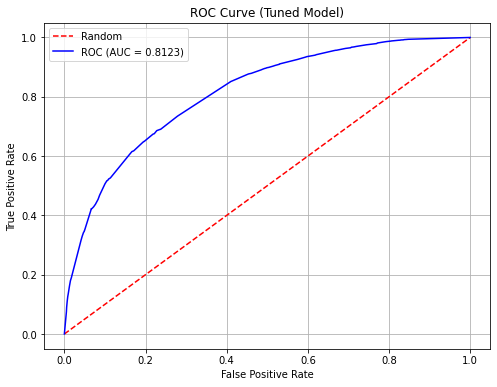

In [13]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.plot(fpr, tpr, 'b-', label=f'ROC (AUC = {roc_auc:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Model)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


## XGBoost on  imbalanced dataset (Shared Algorithm)

In [15]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import matthews_corrcoef, accuracy_score, precision_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [16]:
imbalanced_data = pd.read_csv("Unbalanced_hotel_data.csv")
X = imbalanced_data.drop(columns=['is_canceled'])
y = imbalanced_data['is_canceled']

In [17]:
n_samples = len(y)
n_classes = len(np.unique(y))
scale_pos_weight = sum(y == 0) / sum(y == 1)  

In [18]:
# Split the data into training and testing sets 70:30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [19]:
param_grid = {
    'max_depth': [3, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0]
}

base_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)

print("Starting Grid Search...")
grid_search = GridSearchCV(
    estimator=base_xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("\nBest Parameters:")
print(grid_search.best_params_)
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

Starting Grid Search...

Best Parameters:
{'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validation Score: 0.7773


In [20]:

best_xgb = grid_search.best_estimator_

y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

In [21]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
roc_auc = auc(fpr, tpr)

print("\nBest Model Performance on Test Set:")
print("-" * 50)
print(f"Accuracy: {accuracy:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))





Best Model Performance on Test Set:
--------------------------------------------------
Accuracy: 0.7753
MCC: 0.4961
Precision: 0.8018
AUC: 0.8536

Classification Report:
              precision    recall  f1-score   support

           0     0.8897    0.7866    0.8350     18650
           1     0.5727    0.7456    0.6478      7151

    accuracy                         0.7753     25801
   macro avg     0.7312    0.7661    0.7414     25801
weighted avg     0.8018    0.7753    0.7831     25801



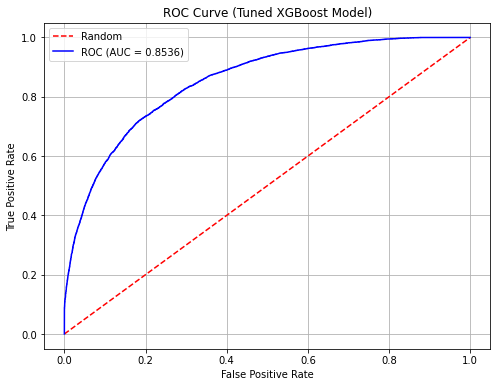

In [22]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.plot(fpr, tpr, 'b-', label=f'ROC (AUC = {roc_auc:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned XGBoost Model)')
plt.legend()
plt.grid(True)
plt.show()


## XGBoost on balanced dataset (Shared Algorithm)

In [23]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
balanced_data = pd.read_csv("Balanced_hotel_data.csv")
X = balanced_data.drop(columns=['is_canceled'])
y = balanced_data['is_canceled']

In [25]:
# Split the data into training and testing sets 70:30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

In [26]:
param_grid = {
    'max_depth': [3, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0]
}

base_xgb = XGBClassifier(
    objective='binary:logistic',
    random_state=42
)

print("Starting Grid Search...")
grid_search = GridSearchCV(
    estimator=base_xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

print("\nBest Parameters:")
print(grid_search.best_params_)
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

Starting Grid Search...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best Parameters:
{'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validation Score: 0.7627


In [27]:
best_xgb = grid_search.best_estimator_

y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
roc_auc = auc(fpr, tpr)

cm = confusion_matrix(y_test, y_pred)

print("\nBest Model Performance on Test Set:")
print("-" * 50)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Best Model Performance on Test Set:
--------------------------------------------------
Accuracy: 0.7666
Precision: 0.7666
AUC: 0.8506

Classification Report:
              precision    recall  f1-score   support

           0     0.7671    0.7658    0.7664      7151
           1     0.7661    0.7674    0.7668      7150

    accuracy                         0.7666     14301
   macro avg     0.7666    0.7666    0.7666     14301
weighted avg     0.7666    0.7666    0.7666     14301



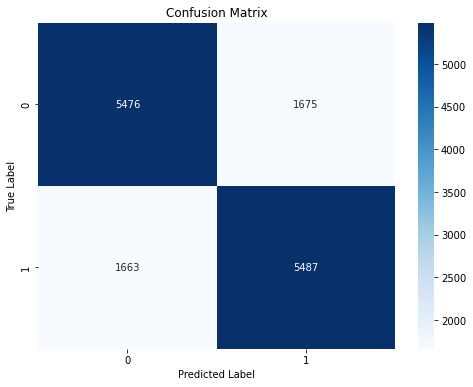

In [29]:


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


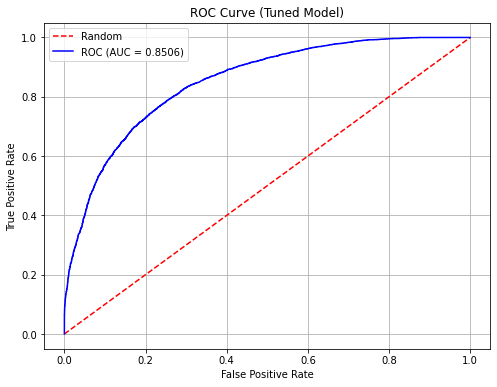

In [30]:

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.plot(fpr, tpr, 'b-', label=f'ROC (AUC = {roc_auc:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Model)')
plt.legend()
plt.grid(True)
plt.show()
